In [89]:
import os
os.chdir('C:\\Users\\User\\Documents\\stat2020\\ass3')
os.getcwd()

'C:\\Users\\User\\Documents\\stat2020\\ass3'

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [91]:
orig_df = pd.read_excel('Assignment3_cluster2.xlsx',sheet_name='2560')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,10465.1,71491.8,84646.4,225910.0,13502.7
1,b,3894.0,2853.3,4777.3,9458.4,14429.3
2,c,90837.3,25772.7,8398.4,3536.4,84905.1
3,d,12014.6,6188.9,3343.7,238.8,195927.6
4,e,2997.4,2590.2,604.2,1147.2,1370.6


<AxesSubplot:>

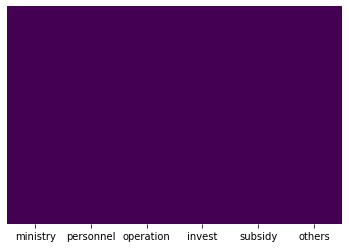

In [92]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [93]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28651.440909,10667.604545,18439.677273,33772.368182,16721.222727
std,58578.328511,16531.805294,33587.920479,75376.212047,44036.691516
min,402.300000,338.400000,411.800000,24.700000,219.100000
25%,2152.225000,1260.350000,703.850000,700.000000,980.600000
50%,6256.350000,3127.150000,3235.850000,2244.200000,1850.150000
75%,15974.075000,13719.325000,18314.800000,9219.575000,7785.450000
max,258020.800000,71491.800000,137892.700000,246083.200000,195927.600000


In [94]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [95]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,10465.1,71491.8,84646.4,225910.0,13502.7
1,3894.0,2853.3,4777.3,9458.4,14429.3
2,90837.3,25772.7,8398.4,3536.4,84905.1
3,12014.6,6188.9,3343.7,238.8,195927.6
4,2997.4,2590.2,604.2,1147.2,1370.6
5,1424.4,1113.7,1658.1,405.3,1946.9
6,2667.9,3401.0,952.7,4419.3,219.1
7,25027.8,14022.7,46346.7,1952.3,917.9
8,9248.9,2344.5,137892.7,462.3,801.6
9,10468.6,6712.3,12880.3,2224.8,1435.0


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.039061,1.000000,0.612700,0.918015,0.067874
1,0.013554,0.035345,0.031754,0.038339,0.072609
2,0.351042,0.357457,0.058092,0.014272,0.432715
3,0.045076,0.082224,0.021326,0.000870,1.000000
4,0.010073,0.031647,0.001399,0.004562,0.005884


In [97]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.109655,0.145168,0.131130,0.137153,0.084320
std,0.227384,0.232340,0.244310,0.306335,0.225012
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006793,0.012957,0.002124,0.002744,0.003891
50%,0.022724,0.039193,0.020541,0.009020,0.008334
75%,0.060445,0.188057,0.130222,0.037369,0.038661
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

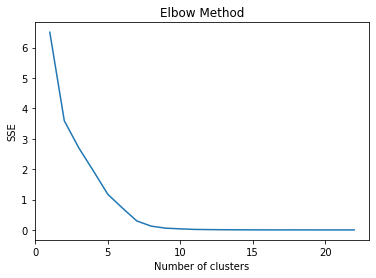

In [98]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [99]:
k = 6

In [100]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [101]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,10465.1,71491.8,84646.4,225910.0,13502.7,1
1,3894.0,2853.3,4777.3,9458.4,14429.3,0
2,90837.3,25772.7,8398.4,3536.4,84905.1,4
3,12014.6,6188.9,3343.7,238.8,195927.6,4
4,2997.4,2590.2,604.2,1147.2,1370.6,0
5,1424.4,1113.7,1658.1,405.3,1946.9,0
6,2667.9,3401.0,952.7,4419.3,219.1,0
7,25027.8,14022.7,46346.7,1952.3,917.9,0
8,9248.9,2344.5,137892.7,462.3,801.6,3
9,10468.6,6712.3,12880.3,2224.8,1435.0,0


In [102]:
df.to_csv('res_2560.csv')

In [103]:
df.cluster_id.value_counts()

0    16
4     2
5     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

In [104]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.5501873630777913


In [105]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.3964117094518267


In [106]:
df[df.cluster_id==0].mean()

personnel     14528.19375
operation      4953.46250
invest         6782.86875
subsidy        5703.23125
others         2244.92500
cluster_id        0.00000
dtype: float64